In [2]:
from time import time

import tensorflow as tf
import os
import pandas
import io
import imageio
import sklearn
import glob
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib as mpl
from tensorflow.python.data import AUTOTUNE


mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools


In [3]:
!pip install -q kaggle
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-su0pg45o
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-su0pg45o
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c0d57ee6370eb36d082adf80e31b1399cdf3517e_-py3-none-any.whl size=157215 sha256=55c42387d12877169bb6fd1772162917dd729af6214d3fdad6e2c9ed7b75b79f
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8k01jty/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanzam98","key":"d5eaf4a24b757991373f365ed9070cea"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c gan-getting-started

  0% 0.00/19.3k [00:00<?, ?B/s]
100% 19.3k/19.3k [00:00<00:00, 15.7MB/s]
  0% 0.00/9.20k [00:00<?, ?B/s]
100% 9.20k/9.20k [00:00<00:00, 9.54MB/s]
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 11.6MB/s]
  0% 0.00/5.99k [00:00<?, ?B/s]
100% 5.99k/5.99k [00:00<00:00, 6.30MB/s]
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 9.94MB/s]
  0% 0.00/9.82k [00:00<?, ?B/s]
100% 9.82k/9.82k [00:00<00:00, 10.3MB/s]
  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 12.7MB/s]
  0% 0.00/12.9k [00:00<?, ?B/s]
100% 12.9k/12.9k [00:00<00:00, 14.7MB/s]
  0% 0.00/12.2k [00:00<?, ?B/s]
100% 12.2k/12.2k [00:00<00:00, 12.4MB/s]
  0% 0.00/22.8k [00:00<?, ?B/s]
100% 22.8k/22.8k [00:00<00:00, 22.5MB/s]
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 13.6MB/s]
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 13.4MB/s]
  0% 0.00/4.28k [00:00<?, ?B/s]
100% 4.28k/4.28k [00:00<00:00, 3.82MB/s]
  0% 0.00/8.66k [00:00<?, ?B/s]
100% 8.66k/8.66k [0

In [7]:
!unzip '*.tfrec.zip'

Archive:  photo00-352.tfrec.zip
  inflating: photo00-352.tfrec       

Archive:  photo17-352.tfrec.zip
  inflating: photo17-352.tfrec       

Archive:  photo04-352.tfrec.zip
  inflating: photo04-352.tfrec       

Archive:  photo10-352.tfrec.zip
  inflating: photo10-352.tfrec       

Archive:  photo15-352.tfrec.zip
  inflating: photo15-352.tfrec       

Archive:  photo12-352.tfrec.zip
  inflating: photo12-352.tfrec       

Archive:  photo08-352.tfrec.zip
  inflating: photo08-352.tfrec       

Archive:  photo09-352.tfrec.zip
  inflating: photo09-352.tfrec       

Archive:  photo14-352.tfrec.zip
  inflating: photo14-352.tfrec       

Archive:  photo11-352.tfrec.zip
  inflating: photo11-352.tfrec       

Archive:  photo01-352.tfrec.zip
  inflating: photo01-352.tfrec       

Archive:  monet16-60.tfrec.zip
  inflating: monet16-60.tfrec        

Archive:  photo02-352.tfrec.zip
  inflating: photo02-352.tfrec       

Archive:  monet08-60.tfrec.zip
  inflating: monet08-60.tfrec        

Archive:

In [8]:
path_monet = "monet*.tfrec"
path_photo = "photo*.tfrec"


MONET_FILENAMES = tf.io.gfile.glob(path_monet)
PHOTO_FILENAMES = tf.io.gfile.glob(path_photo)
'''!ls -larth
!pwd
'''
print(MONET_FILENAMES)
print(PHOTO_FILENAMES)
IMAGE_SIZE = [256, 256]


['./monet04-60.tfrec', './monet12-60.tfrec', './monet08-60.tfrec', './monet16-60.tfrec', './monet00-60.tfrec']
['./photo17-352.tfrec', './photo15-352.tfrec', './photo10-352.tfrec', './photo05-352.tfrec', './photo07-352.tfrec', './photo04-352.tfrec', './photo19-350.tfrec', './photo13-352.tfrec', './photo11-352.tfrec', './photo16-352.tfrec', './photo06-352.tfrec', './photo14-352.tfrec', './photo18-352.tfrec', './photo03-352.tfrec', './photo08-352.tfrec', './photo09-352.tfrec', './photo12-352.tfrec', './photo01-352.tfrec', './photo00-352.tfrec', './photo02-352.tfrec']


In [9]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image


def read_tfrecord(example):
    tfrecord_format = {
        "image": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image


def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

BATCH_SIZE = 1
BUFFER_SIZE = 60000

monet_ds = load_dataset(MONET_FILENAMES).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
photo_ds = load_dataset(PHOTO_FILENAMES).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(monet_ds)


<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>


In [10]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

print(type(train_images))

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


InvalidArgumentError: ignored

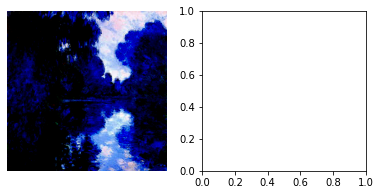

In [11]:
# Visualisation MONET
plt.figure(figsize=(10, 10))
for images in monet_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    #plt.imshow((images[i]*255).numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
plt.figure(figsize=(10, 10))
for images in monet_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    # plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [48]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(4, 4), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 64, 64, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(4, 4), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 256, 256, 3) # 28 28 1 ILAYSSSS

    return model



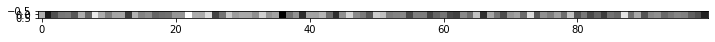

In [49]:
generator = make_generator_model()

noise = tf.random.normal([1,100])
generated_image = generator(noise, training=False)

# plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.imshow(noise, cmap='gray')

In [38]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[256, 256, 3])) # 28  28 1 ILYASSSS
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[-0.00016802]], shape=(1, 1), dtype=float32)


In [30]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [31]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)
  
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [32]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [33]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [34]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [35]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [36]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

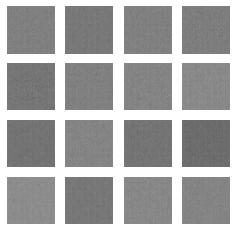

Time for epoch 24 is 213.49351406097412 sec


KeyboardInterrupt: ignored

In [50]:
train(photo_ds, EPOCHS)

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)